In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import RobustScaler,MinMaxScaler
label_encoder=LabelEncoder()
oh_encoder=OneHotEncoder()
scaler=MinMaxScaler()
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

## Feature Names for the KDD Dataset

In [3]:
names="""duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: continuous.
dst_host_same_srv_rate: continuous.
dst_host_diff_srv_rate: continuous.
dst_host_same_src_port_rate: continuous.
dst_host_srv_diff_host_rate: continuous.
dst_host_serror_rate: continuous.
dst_host_srv_serror_rate: continuous.
dst_host_rerror_rate: continuous.
dst_host_srv_rerror_rate: continuous."""
names=names.split("\n")

In [4]:
final_names=[]
for obj in names:
    idx=obj.index(":")
    colname=obj[:idx]
    final_names.append(colname)

In [5]:
final_names.append('output')
kdd=pd.read_csv('kddcup.data_10_percent_corrected',names=final_names)

In [12]:
temp=kdd.copy()

In [7]:
categoricals=['output','protocol_type','service','flag']
continuous=temp.drop(categoricals,axis=1).columns

In [8]:
temp[continuous]=scaler.fit_transform(temp[continuous])

In [9]:
label_encoder=LabelEncoder()

In [13]:
temp['output']=label_encoder.fit_transform(temp['output'])

In [14]:
temp['output'].value_counts()

18    280790
9     107201
11     97278
0       2203
17      1589
5       1247
15      1040
21      1020
20       979
14       264
10       231
3         53
1         30
6         21
22        20
4         12
16        10
7          9
2          8
8          7
13         4
12         3
19         2
Name: output, dtype: int64

In [15]:
kdd['output'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: output, dtype: int64

In [10]:
temp2=pd.get_dummies(temp,columns=['protocol_type'])
temp=temp2

In [11]:
label_encoder=LabelEncoder()
temp['service']=label_encoder.fit_transform(temp['service'])

In [12]:
label_encoder=LabelEncoder()
temp['flag']=label_encoder.fit_transform(temp['flag'])

## Finding instances of each output class

In [13]:
temp['output'].value_counts().sort_values()

19         2
12         3
13         4
8          7
2          8
7          9
16        10
4         12
22        20
6         21
1         30
3         53
10       231
14       264
20       979
21      1020
15      1040
5       1247
17      1589
0       2203
11     97278
9     107201
18    280790
Name: output, dtype: int64

## Removing Output Classes of Low Counts

In [14]:
remove_idx=temp[(temp['output']==19)|(temp['output']==12)|(temp['output']==13)].index

In [15]:
remove_idx

Int64Index([4113, 42057, 78529, 86543, 91617, 140387, 140388, 344875, 452731], dtype='int64')

In [16]:
temp.drop(remove_idx,inplace=True)

In [17]:
temp2=temp.sample(n=500)
temp2.reset_index(drop=True,inplace=True)

In [40]:
#subset


In [23]:
X=temp.drop(['output','service'],axis=1)
y=temp['output']
X_train,X_test,y_train,y_test=train_test_split(X,y)

# Forming the Ensemble Model

In [18]:
from mealpy.swarm_based.SFO import ImprovedSFO
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC,NuSVC

In [19]:
models=[]

cls1 = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
models.append(cls1)


cls2 = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
models.append(cls2)

cls3 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
models.append(cls3)


model1 = SVC(kernel = "rbf", random_state = 0, gamma = 0.1, probability = True)
models.append(model1)

model2 = SVC(kernel = "rbf", random_state = 0, gamma = 0.2, probability = True)
models.append(model2)

model3 = SVC(kernel = "rbf", random_state = 0, gamma = 0.5, probability = True)
models.append(model3)

In [24]:
features=X_train.columns
selected_feats=[]
bestpop= [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0]
for idx in range(len(bestpop)):
    if bestpop[idx]==1:
        selected_feats.append(features[idx])

In [25]:
selected_feats

['duration',
 'protocol_type',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'num_failed_logins',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_shells',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [34]:
X_train=X_train[selected_feats]
X_test=X_test[selected_feats]

# Defining the Objective Function

In [22]:
def objf(wts, models=models):
    
    model = VotingClassifier(estimators=[('knn1', models[0]), ('knn2', models[1]), ('knn3', models[2]), ('svm1', models[3]), ('svm2', models[4]), 
                                         ('svm3', models[5])], 
                             voting='soft', weights = wts)
    
    model.fit(X_train, y_train)
    final_pred = model.predict(X_test)
    fitness=mean_squared_error(y_test,final_pred)
    return fitness

In [44]:
temp.shape

(494012, 44)

# Sailfish Optimizer

In [ ]:
from numpy.random import uniform, choice
from numpy import abs
from copy import deepcopy
from mealpy.root import Root


class BaseSFO(Root):
    """
    The original version of: Sailfish Optimizer (SFO)
        (The Sailfish Optimizer: A novel nature-inspired metaheuristic algorithm for solving constrained engineering optimization problems)
    """

    def __init__(self, obj_func=None, lb=None, ub=None, problem_size=50, batch_size=10, verbose=True,
                 epoch=750, pop_size=100, pp=0.1, A=4, epxilon=0.0001):
        Root.__init__(self, obj_func, lb, ub, problem_size, batch_size, verbose)
        self.epoch = epoch
        self.pop_size = pop_size        # SailFish pop size
        self.pp = pp                    # the rate between SailFish and Sardines (N_sf = N_s * pp) = 0.25, 0.2, 0.1
        self.A = A                      # A = 4, 6,...
        self.epxilon = epxilon          # = 0.0001, 0.001

    def train(self):
        s_size = int(self.pop_size / self.pp)
        sf_pop = [self.create_solution() for _ in range(0, self.pop_size)]
        s_pop = [self.create_solution() for _ in range(0, s_size)]
        sf_gbest = self.get_global_best_solution(sf_pop, self.ID_FIT, self.ID_MIN_PROB)
        s_gbest = self.get_global_best_solution(s_pop, self.ID_FIT, self.ID_MIN_PROB)

        for epoch in range(0, self.epoch):

            ## Calculate lamda_i using Eq.(7)
            ## Update the position of sailfish using Eq.(6)
            for i in range(0, self.pop_size):
                PD = 1 - len(sf_pop) / ( len(sf_pop) + len(s_pop) )
                lamda_i = 2 * uniform() * PD - PD
                sf_pop[i][self.ID_POS] = s_gbest[self.ID_POS] - lamda_i * ( uniform() *
                                        ( sf_gbest[self.ID_POS] + s_gbest[self.ID_POS] ) / 2 - sf_pop[i][self.ID_POS] )

            ## Calculate AttackPower using Eq.(10)
            AP = self.A * ( 1 - 2 * (epoch + 1) * self.epxilon )
            if AP < 0.5:
                alpha = int(len(s_pop) * abs(AP) )
                beta = int(self.problem_size * abs(AP))
                ### Random choice number of sardines which will be updated their position
                list1 = choice(range(0, len(s_pop)), alpha)
                for i in range(0, len(s_pop)):
                    if i in list1:
                        #### Random choice number of dimensions in sardines updated, remove third loop by numpy vector computation
                        list2 = choice(range(0, self.problem_size), beta, replace=False)
                        s_pop[i][self.ID_POS][list2] = (uniform(0, 1, self.problem_size) * (sf_gbest[self.ID_POS] - s_pop[i][self.ID_POS] + AP))[list2]
            else:
                ### Update the position of all sardine using Eq.(9)
                for i in range(0, len(s_pop)):
                    s_pop[i][self.ID_POS] = uniform()*( sf_gbest[self.ID_POS] - s_pop[i][self.ID_POS] + AP )

            ## Recalculate the fitness of all sardine
            for i in range(0, len(s_pop)):
                s_pop[i][self.ID_FIT] = self.get_fitness_position(s_pop[i][self.ID_POS], self.ID_MIN_PROB)

            ## Sort the population of sailfish and sardine (for reducing computational cost)
            sf_pop = sorted(sf_pop, key=lambda temp: temp[self.ID_FIT])
            s_pop = sorted(s_pop, key=lambda temp: temp[self.ID_FIT])
            for i in range(0, self.pop_size):
                for j in range(0, len(s_pop)):
                    ### If there is a better position in sardine population.
                    if sf_pop[i][self.ID_FIT] > s_pop[j][self.ID_FIT]:
                        sf_pop[i] = deepcopy(s_pop[j])
                        del s_pop[j]
                    break   #### This simple keyword helped reducing ton of comparing operation.
                            #### Especially when sardine pop size >> sailfish pop size

            s_pop = s_pop + [self.create_solution() for _ in range(0, s_size - len(s_pop))]

            sf_gbest = self.update_global_best_solution(sf_pop, self.ID_MIN_PROB, sf_gbest)
            s_gbest = self.update_global_best_solution(s_pop, self.ID_MIN_PROB, s_gbest)

            self.loss_train.append(sf_gbest[self.ID_FIT])
            if self.verbose:
                print("> Epoch: {}, Best fit: {}".format(epoch + 1, sf_gbest[self.ID_FIT]))
        self.solution = sf_gbest
        return sf_gbest[self.ID_POS], sf_gbest[self.ID_FIT], self.loss_train


class ImprovedSFO(Root):
    """
    My improved version of: Sailfish Optimizer (SFO)
    Notes:
        + Reform Energy equation,
        + No need parameter A and epxilon
        + Based on idea of Opposition-based Learning
    """

    def __init__(self, obj_func=None, lb=None, ub=None, problem_size=50, batch_size=10, verbose=True,
                 epoch=750, pop_size=100, pp=0.1):
        Root.__init__(self, obj_func, lb, ub, problem_size, batch_size, verbose)
        self.epoch = epoch
        self.pop_size = pop_size       # SailFish pop size
        self.pp = pp                   # the rate between SailFish and Sardines (N_sf = N_s * pp) = 0.25, 0.2, 0.1

    def train(self):
        s_size = int(self.pop_size / self.pp)
        sf_pop = [self.create_solution() for _ in range(0, self.pop_size)]
        s_pop = [self.create_solution() for _ in range(0, s_size)]
        sf_gbest = self.get_global_best_solution(sf_pop, self.ID_FIT, self.ID_MIN_PROB)
        s_gbest = self.get_global_best_solution(s_pop, self.ID_FIT, self.ID_MIN_PROB)

        for epoch in range(0, self.epoch):
            ## Calculate lamda_i using Eq.(7)
            ## Update the position of sailfish using Eq.(6)
            for i in range(0, self.pop_size):
                PD = 1 - len(sf_pop) / ( len(sf_pop) + len(s_pop) )
                lamda_i = 2 * uniform() * PD - PD
                sf_pop[i][self.ID_POS] = s_gbest[self.ID_POS] - lamda_i * ( uniform() *
                                        ( sf_gbest[self.ID_POS] + s_gbest[self.ID_POS] ) / 2 - sf_pop[i][self.ID_POS] )

            ## ## Calculate AttackPower using my Eq.thieu
            #### This is our proposed, simple but effective, no need A and epxilon parameters
            AP = 1 - epoch * 1.0 / self.epoch
            if AP < 0.5:
                for i in range(0, len(s_pop)):
                    temp = (sf_gbest[self.ID_POS] + AP) / 2
                    s_pop[i][self.ID_POS] = self.lb + self.ub - temp + uniform() * (temp - s_pop[i][self.ID_POS])
            else:
                ### Update the position of all sardine using Eq.(9)
                for i in range(0, len(s_pop)):
                    s_pop[i][self.ID_POS] = uniform() * (sf_gbest[self.ID_POS] - s_pop[i][self.ID_POS] + AP)

            ## Recalculate the fitness of all sardine
            for i in range(0, len(s_pop)):
                s_pop[i][self.ID_FIT] = self.get_fitness_position(s_pop[i][self.ID_POS], self.ID_MIN_PROB)

            ## Sort the population of sailfish and sardine (for reducing computational cost)
            sf_pop = sorted(sf_pop, key=lambda temp: temp[self.ID_FIT])
            s_pop = sorted(s_pop, key=lambda temp: temp[self.ID_FIT])
            for i in range(0, self.pop_size):
                for j in range(0, len(s_pop)):
                    ### If there is a better position in sardine population.
                    if sf_pop[i][self.ID_FIT] > s_pop[j][self.ID_FIT]:
                        sf_pop[i] = deepcopy(s_pop[j])
                        del s_pop[j]
                    break   #### This simple keyword helped reducing ton of comparing operation.
                            #### Especially when sardine pop size >> sailfish pop size
            s_pop = s_pop + [self.create_solution() for _ in range(0, s_size - len(s_pop))]

            sf_gbest = self.update_global_best_solution(sf_pop, self.ID_MIN_PROB, sf_gbest)
            s_gbest = self.update_global_best_solution(s_pop, self.ID_MIN_PROB, s_gbest)

            self.loss_train.append(sf_gbest[self.ID_FIT])
            if self.verbose:
                print("> Epoch: {}, Best fit: {}".format(epoch + 1, sf_gbest[self.ID_FIT]))
        self.solution = sf_gbest
        return sf_gbest[self.ID_POS], sf_gbest[self.ID_FIT], self.loss_train


In [36]:


## Setting parameters
lb = [-1000 for i in range(len(models))] 
ub = [1000 for i in range(len(models))]
#lb and ub are used in the Root class of the optimizers. They are the bounds for 
problem_size = len(models)
#lb and ub are used in the Root class of the optimizers. They are the bounds for 
batch_size = 25
verbose = True
epoch = 5
pop_size = 50
batch_size=25

md1 = ImprovedSFO(objf, lb, ub,problem_size,batch_size, verbose, epoch, pop_size)
best_pos1,best_fit1,list_loss1=md1.train()
#best_pos1, best_fit1, list_loss1 = md1.train()
#print(md1.solution[0])
#print(md1.solution[1])
#print(md1.loss_train)

> Epoch: 1, Best fit: 1.432
> Epoch: 2, Best fit: 1.432
> Epoch: 3, Best fit: 1.432
> Epoch: 4, Best fit: 1.432
> Epoch: 5, Best fit: 1.432
> Epoch: 6, Best fit: 1.432
> Epoch: 7, Best fit: 1.432
> Epoch: 8, Best fit: 1.432
> Epoch: 9, Best fit: 1.432
> Epoch: 10, Best fit: 1.432
> Epoch: 11, Best fit: 1.432
> Epoch: 12, Best fit: 1.432


In [28]:
import time
wts=md1.solution[0]
model = VotingClassifier(estimators=[('knn1', models[0]), ('knn2', models[1]), ('knn3', models[2]), ('svm1', models[3]), ('svm2', models[4]), 
                                         ('svm3', models[5])], 
                             voting='soft', weights = wts)
start=time.time()
model.fit(X_train, y_train)
end=time.time()
final_pred = model.predict(X_test)

## Results Without Feature Selection

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,final_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           9       1.00      1.00      1.00        26
          11       0.92      1.00      0.96        24
          17       1.00      1.00      1.00         1
          18       0.99      0.99      0.99        71
          20       1.00      1.00      1.00         1
          21       0.00      0.00      0.00         1

    accuracy                           0.98       125
   macro avg       0.70      0.71      0.71       125
weighted avg       0.96      0.98      0.97       125



c:\users\mihee\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [2]:
small=pd.read_csv("kdd_small.csv")

In [11]:
small['output'].value_counts().sort_values()

20      23
21      25
15      27
5       27
17      32
0       47
11    2035
9     2121
18    5652
Name: output, dtype: int64

In [15]:
remove_idx=small[(small['output']==7)|(small['output']==14)|(small['output']==10)].index

In [16]:
small.drop(remove_idx,inplace=True)

In [17]:
X=small.drop(['output','service'],axis=1)
y=small['output']
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [20]:
features=X_train.columns
selected_feats=[]
bestpop= [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0]
for idx in range(len(bestpop)):
    if bestpop[idx]==1:
        selected_feats.append(features[idx])

In [21]:
X_train=X_train[selected_feats]
X_test=X_test[selected_feats]

In [23]:
from mealpy.swarm_based.SFO import ImprovedSFO

## Setting parameters
lb = [-1000 for i in range(len(models))] 
ub = [1000 for i in range(len(models))]
#lb and ub are used in the Root class of the optimizers. They are the bounds for 
problem_size = len(models)
#lb and ub are used in the Root class of the optimizers. They are the bounds for 
batch_size = 25
verbose = True
epoch = 5
pop_size = 50
batch_size=25

md1 = ImprovedSFO(objf, lb, ub,problem_size,batch_size, verbose, epoch, pop_size)
best_pos1,best_fit1,list_loss1=md1.train()
#best_pos1, best_fit1, list_loss1 = md1.train()
#print(md1.solution[0])
#print(md1.solution[1])
#print(md1.loss_train)

> Epoch: 1, Best fit: 0.2902321857485989
> Epoch: 2, Best fit: 0.2902321857485989
> Epoch: 3, Best fit: 0.26461168935148116
> Epoch: 4, Best fit: 0.26461168935148116
> Epoch: 5, Best fit: 0.26461168935148116


In [24]:
import time
wts=md1.solution[0]
model = VotingClassifier(estimators=[('knn1', models[0]), ('knn2', models[1]), ('knn3', models[2]), ('svm1', models[3]), ('svm2', models[4]), 
                                         ('svm3', models[5])], 
                             voting='soft', weights = wts)
start=time.time()
model.fit(X_train, y_train)
end=time.time()
final_pred = model.predict(X_test)

## Results Using Feature Selection through GA

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,final_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           5       1.00      0.86      0.92         7
           9       1.00      1.00      1.00       516
          11       0.99      0.99      0.99       532
          15       1.00      1.00      1.00         6
          17       1.00      0.83      0.91        12
          18       1.00      1.00      1.00      1399
          20       1.00      1.00      1.00         9
          21       0.60      0.86      0.71         7

    accuracy                           1.00      2498
   macro avg       0.95      0.95      0.95      2498
weighted avg       1.00      1.00      1.00      2498



In [27]:
import pickle
pickle.dump(model,open('ensemble_model_2_0.sav','wb'))

In [29]:
small.to_csv('kdd_small.csv',index=False)


# Clustering

In [16]:
small['class_labels']=label_encoder.inverse_transform(small['output'])

In [17]:
small['class_labels'].value_counts()

smurf.          5652
neptune.        2121
normal.         2035
back.             47
satan.            32
ipsweep.          27
portsweep.        27
warezclient.      25
teardrop.         23
Name: class_labels, dtype: int64

In [19]:
len(small.columns)

45

In [27]:
selected_feats

['duration',
 'protocol_type',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'num_failed_logins',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_shells',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [28]:
len(bestpop)

42

In [36]:
feature_sets=small.drop(['output','class_labels'],axis=1).columns

In [40]:
len(feature_sets)
final_feats=[]
for idx in range(len(bestpop)):
    if bestpop[idx]==1:
        final_feats.append(feature_sets[idx])

In [45]:
small_feats=small[final_feats]

In [47]:
small_feats['output']=small['output']
small_feats['output_labels']=small['class_labels']

c:\users\mihee\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\mihee\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Plotting Distributions based on feature correlations

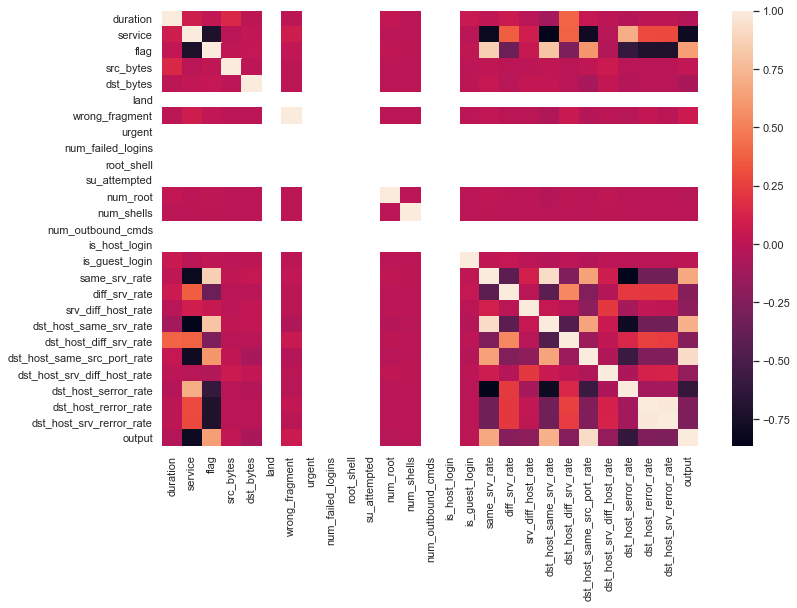

In [90]:
plt.figure(figsize=(12,8))
sns.set_theme(palette='cubehelix',style='whitegrid')
sns.heatmap(small_feats.corr())
plt.show()

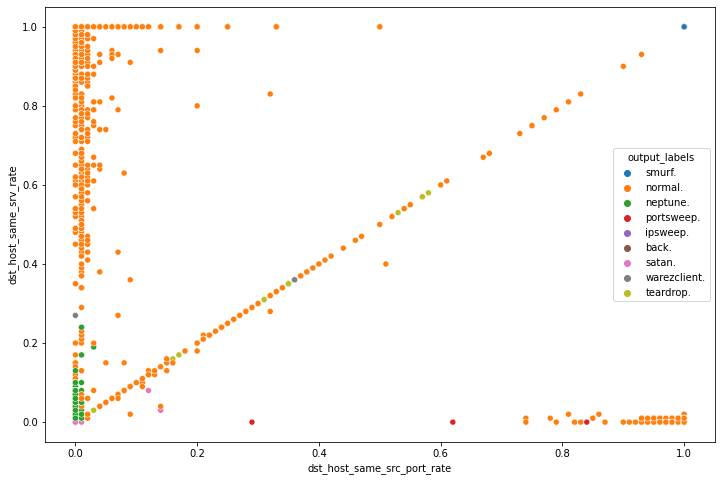

In [53]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='dst_host_same_src_port_rate',y='dst_host_same_srv_rate',hue='output_labels',data=small_feats)
plt.show()

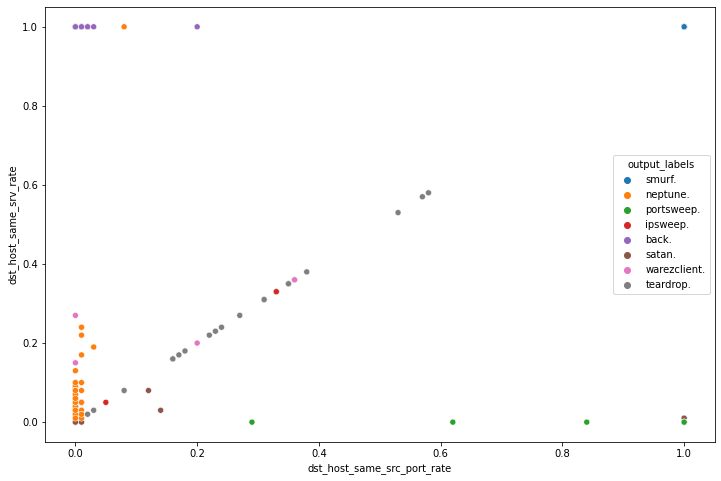

In [60]:
normal_indices=small_feats[small_feats['output_labels']=='normal.'].index
not_normal=small_feats.drop(normal_indices)
plt.figure(figsize=(12,8))
sns.scatterplot(x='dst_host_same_src_port_rate',y='dst_host_same_srv_rate',hue='output_labels',data=not_normal)
plt.show()

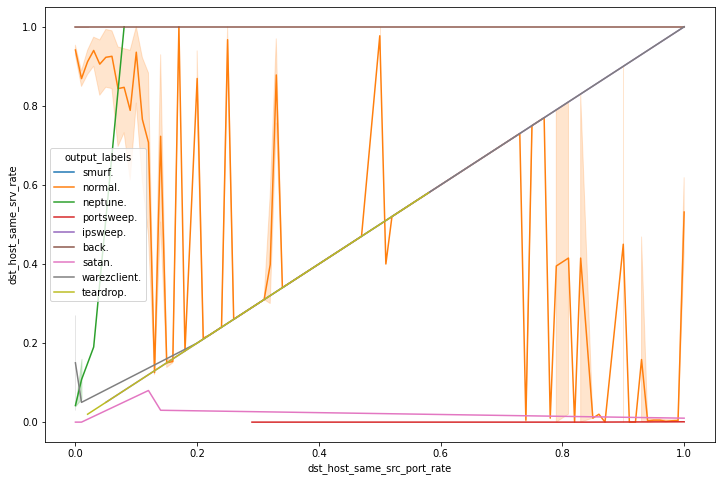

In [69]:
plt.figure(figsize=(12,8))
sns.lineplot(x='dst_host_same_src_port_rate',y='dst_host_same_srv_rate',hue='output_labels',data=small_feats)
plt.show()

In [74]:
plt.figure(figsize=(12,8))
sns.swarmplot(x='dst_host_same_src_port_rate',y='dst_host_same_srv_rate',hue='output_labels',data=small_feats)
plt.show()

<Figure size 864x1008 with 0 Axes>

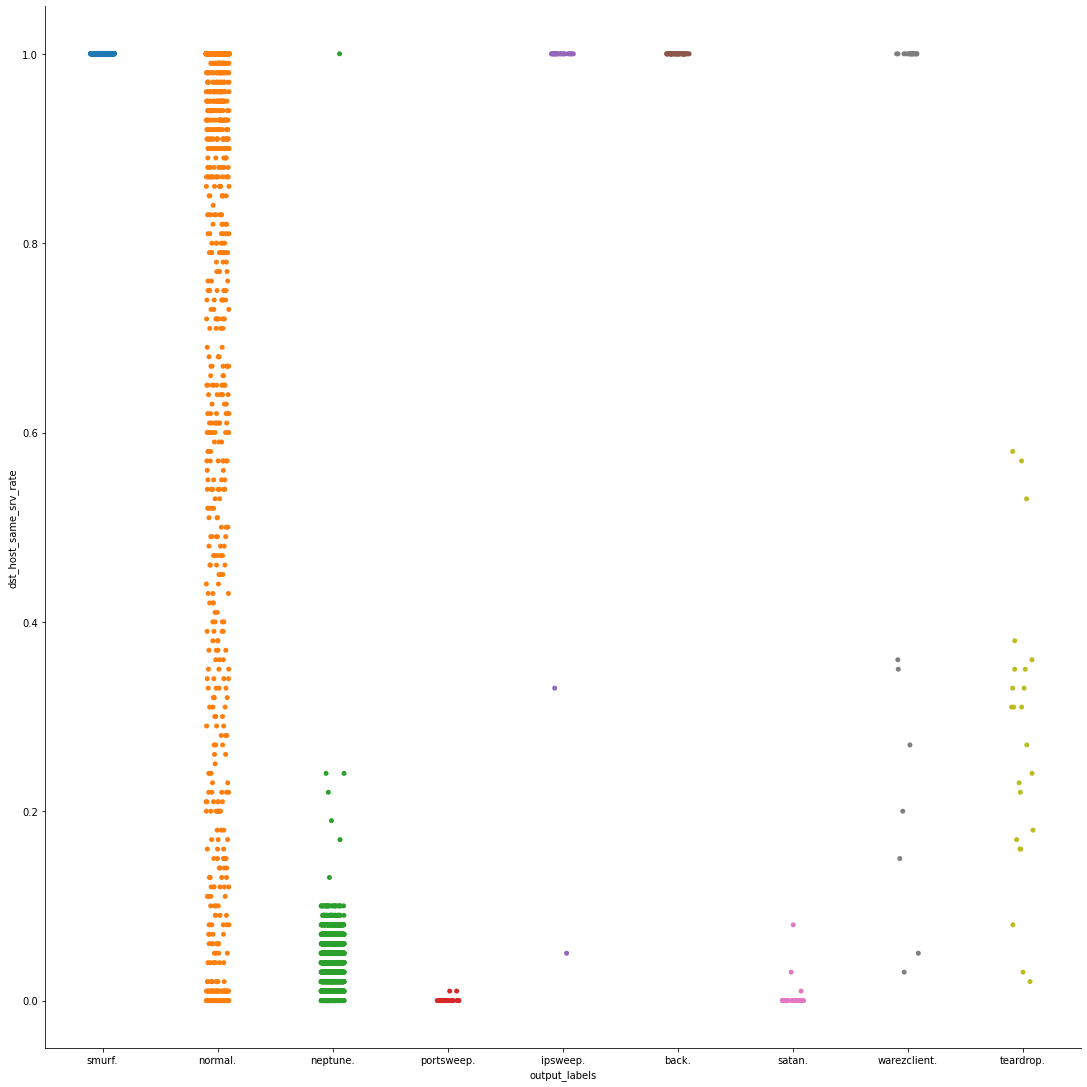

In [73]:
plt.figure(figsize=(12,14))
sns.catplot(x='output_labels',y='dst_host_same_srv_rate',data=small_feats,height=15)
plt.show()

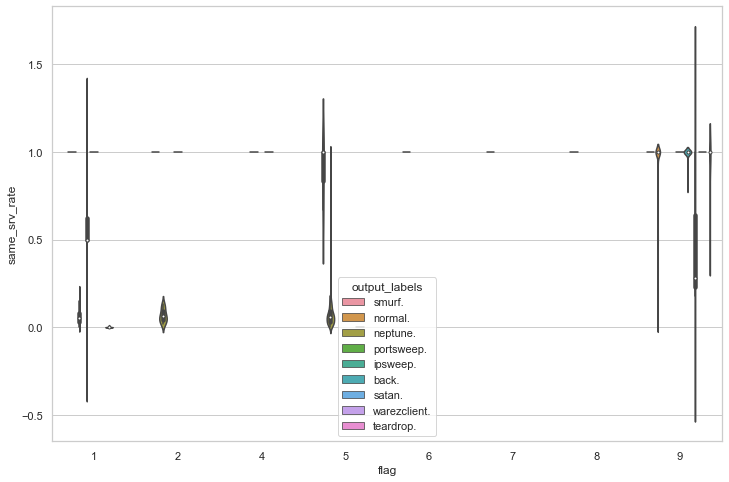

In [93]:
plt.figure(figsize=(12,8))
sns.violinplot(x='flag',y='same_srv_rate',hue='output_labels',data=small_feats)
plt.show()

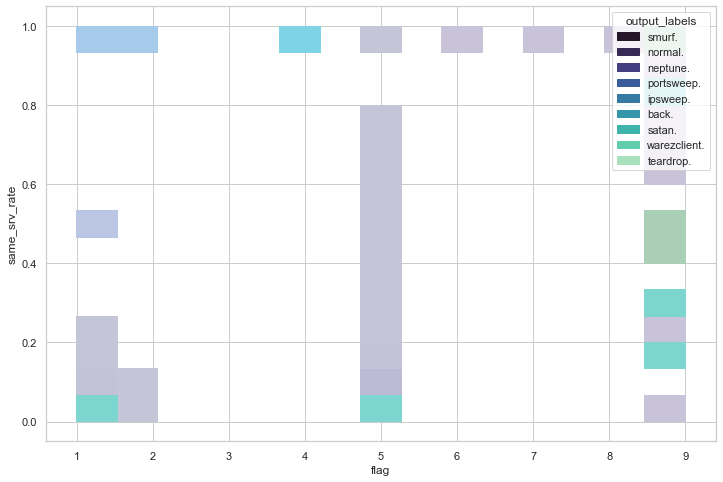

In [96]:
plt.figure(figsize=(12,8))
sns.set_theme(style='whitegrid',palette='mako')
sns.histplot(x='flag',y='same_srv_rate',hue='output_labels',data=small_feats,palette='mako')
plt.show()

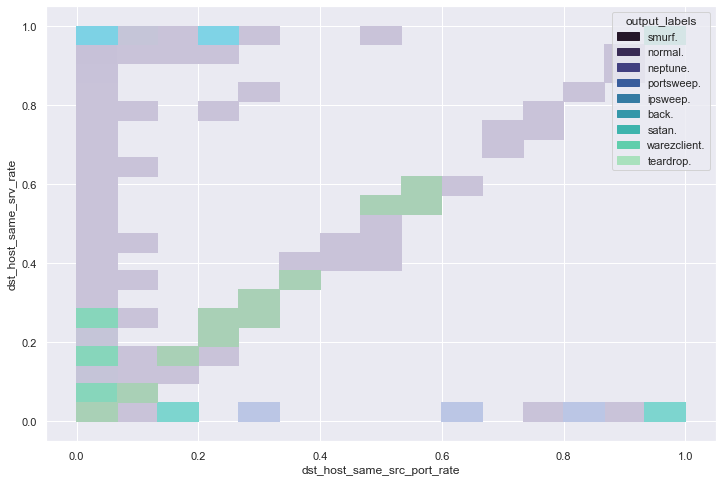

In [98]:
plt.figure(figsize=(12,8))
sns.set_theme(palette='mako')
sns.histplot(x='dst_host_same_src_port_rate',y='dst_host_same_srv_rate',hue='output_labels',data=small_feats,palette='mako')
plt.show()